
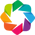

In [273]:
import loren_frank_data_processing as lfdp
import replay_classification as replay
import ripple_detection as ripple
import matplotlib.pyplot as plt
import holoviews as hv
import inspect
import os
import pandas as pd
import numpy as np
from ipywidgets import FloatProgress
from IPython.display import display
import functools
hv.notebook_extension('bokeh')
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
animal_id = 'JZ1'
day, epoch = [1, 2]
ripple_area = 'ca1'
mu_areas = ['ca1', 'mec']
animals = {
    'JZ1': lfdp.Animal(short_name='JZ1', directory='../Raw-Data/JZ1')}
date = 20161114
epoch_index = ('JZ1', 1, 2)
areas = ['ca1']
mark_variables = ['channel_1_max', 'channel_2_max', 'channel_3_max',
                  'channel_4_max']

In [83]:
# os.system('subl {0}'.format(lfdp.__file__))
# os.system('subl ~/anaconda3/envs/Roumis_2018/lib/python3.6/site-packages/loren_frank_data_processing/tetrodes.py')

[autoreload of src.data_iterators failed: Traceback (most recent call last):
  File "/home/droumis/anaconda3/envs/Roumis_2018/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/droumis/anaconda3/envs/Roumis_2018/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/droumis/anaconda3/envs/Roumis_2018/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/droumis/anaconda3/envs/Roumis_2018/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._boot

0

In [17]:
from src.parameters import ANIMALS
epoch_info = lfdp.make_epochs_dataframe(ANIMALS)

In [18]:
epoch_info

environment   type  exposure
animal day epoch                                    
JZ1    1   1                  sleep  sleep       NaN
           2                 wtrack    run       1.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       2.0
           5                  sleep  sleep       NaN
           6              openfield    run       1.0
           7                  sleep  sleep       NaN
           8              openfield    run       2.0
           9                  sleep  sleep       NaN
       2   1                  sleep  sleep       NaN
           2                 wtrack    run       3.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       4.0
           5                  sleep  sleep       NaN
           6              openfield    run       3.0
           7                  sleep  sleep       NaN
           8              openfield    run       4.0
           9                  sleep  sleep       NaN
       3   1                  sleep  sleep       NaN
           2                 wtrack    run       5.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run       5.0
           7                  sleep  sleep       NaN
           8              openfield    run       6.0
           9                  sleep  sleep       NaN
       4   1                  sleep  sleep       NaN
           2                 wtrack    run       7.0
           3                  sleep  sleep       NaN
...                             ...    ...       ...
       11  7                  sleep  sleep       NaN
           8              openfield    run      22.0
           9                  sleep  sleep       NaN
       12  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       5.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run      23.0
           7                  sleep  sleep       NaN
           8              openfield    run      24.0
           9                  sleep  sleep       NaN
       13  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       7.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       8.0
           5                  sleep  sleep       NaN
           6              openfield    run      25.0
           7                  sleep  sleep       NaN
           8              openfield    run      26.0
           9                  sleep  sleep       NaN
       14  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       9.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run      10.0
           5                  sleep  sleep       NaN
           6              openfield    run      27.0
           7                  sleep  sleep       NaN
           8              openfield    run      28.0
           9                  sleep  sleep       NaN

[126 rows x 3 columns]

In [3]:
ntrode_df = lfdp.make_tetrode_dataframe(animals)
ntrode_keys = ntrode_df.xs(epoch_index, drop_level=False).index.values
ntrodes = ntrode_df.xs(
    epoch_index, drop_level=False
).index.get_level_values('tetrode_number').tolist()

# mec_ntrode_df = ntrode_df.xs(
#     epoch_index, drop_level=False
# ).query('area == "mec"')

# ca1_ntrode_df = ntrode_df.xs(
#     epoch_index, drop_level=False
# ).query('area == "ca1"')

In [4]:
position_variables = ['linear_distance', 'trajectory_direction', 'speed']
position_df = lfdp.get_interpolated_position_dataframe(epoch_index, animals)
# add the time index values as another col
position_df['time'] = position_df.index

In [6]:
f = FloatProgress(min=0, max=ntrode_keys.shape[0])
f.value = 0
display(f)
mu_df = []
for key_num, ntrode_key in enumerate(ntrode_keys):
    mu_df.append(lfdp.get_multiunit_indicator_dataframe(ntrode_key, animals))
    f.value += 1

FloatProgress(value=0.0, max=30.0)

In [8]:
f = FloatProgress(min=0, max=ntrode_keys.shape[0])
f.value = 0
display(f)
mark_times = []
for key_num, ntrode_key in enumerate(ntrode_keys):
    mark_times.append(lfdp.get_multiunit_dataframe(ntrode_key, animals))
    f.value += 1

FloatProgress(value=0.0, max=30.0)

In [716]:
mark_times[0].head()

channel_1_max  channel_2_max  channel_3_max  channel_4_max
time                                                                       
00:00:00            670.930481     634.863586     739.206848     607.044678
00:00:00            622.246582     612.895630     683.409241     593.562683
00:00:00            567.774231     511.022003     602.109497     470.557068
00:00:00.000200     622.246582     612.895630     683.409241     593.562683
00:00:00.006800     670.930481     634.863586     739.206848     607.044678

In [717]:
mu_df[0]

channel_1_max  channel_2_max  channel_3_max  channel_4_max
time                                                                       
00:28:00.085200            NaN            NaN            NaN            NaN
00:28:00.085867            NaN            NaN            NaN            NaN
00:28:00.086533            NaN            NaN            NaN            NaN
00:28:00.087200            NaN            NaN            NaN            NaN
00:28:00.087867            NaN            NaN            NaN            NaN
00:28:00.088533            NaN            NaN            NaN            NaN
00:28:00.089200            NaN            NaN            NaN            NaN
00:28:00.089867            NaN            NaN            NaN            NaN
00:28:00.090533            NaN            NaN            NaN            NaN
00:28:00.091200            NaN            NaN            NaN            NaN
00:28:00.091867            NaN            NaN            NaN            NaN
00:28:00.092533            NaN            NaN            NaN            NaN
00:28:00.093200            NaN            NaN            NaN            NaN
00:28:00.093867            NaN            NaN            NaN            NaN
00:28:00.094533            NaN            NaN            NaN            NaN
00:28:00.095200            NaN            NaN            NaN            NaN
00:28:00.095867            NaN            NaN            NaN            NaN
00:28:00.096533            NaN            NaN            NaN            NaN
00:28:00.097200            NaN            NaN            NaN            NaN
00:28:00.097867            NaN            NaN            NaN            NaN
00:28:00.098533            NaN            NaN            NaN            NaN
00:28:00.099200            NaN            NaN            NaN            NaN
00:28:00.099867            NaN            NaN            NaN            NaN
00:28:00.100533            NaN            NaN            NaN            NaN
00:28:00.101200            NaN            NaN            NaN            NaN
00:28:00.101867            NaN            NaN            NaN            NaN
00:28:00.102533            NaN            NaN            NaN            NaN
00:28:00.103200            NaN            NaN            NaN            NaN
00:28:00.103867            NaN            NaN            NaN            NaN
00:28:00.104533            NaN            NaN            NaN            NaN
...                        ...            ...            ...            ...
00:48:15.124533      41.521397     -22.454744      -5.823464    -141.581512
00:48:15.125200            NaN            NaN            NaN            NaN
00:48:15.125867            NaN            NaN            NaN            NaN
00:48:15.126533            NaN            NaN            NaN            NaN
00:48:15.127200            NaN            NaN            NaN            NaN
00:48:15.127867            NaN            NaN            NaN            NaN
00:48:15.128533            NaN            NaN            NaN            NaN
00:48:15.129200     511.914215     513.425842     515.543823     497.788300
00:48:15.129867            NaN            NaN            NaN            NaN
00:48:15.130533            NaN            NaN            NaN            NaN
00:48:15.131200            NaN            NaN            NaN            NaN
00:48:15.131867            NaN            NaN            NaN            NaN
00:48:15.132533     567.774231     511.022003     602.109497     470.557068
00:48:15.133200            NaN            NaN            NaN            NaN
00:48:15.133867            NaN            NaN            NaN            NaN
00:48:15.134533            NaN            NaN            NaN            NaN
00:48:15.135200      81.322594      54.809883     203.152344     114.306206
00:48:15.135867            NaN            NaN            NaN            NaN
00:48:15.136533     516.147644     501.557007     512.470276     475.533356
00:48:15.137200            NaN            NaN            NaN     

# per minute chunk marks

In [234]:
%autoreload 2
from src.data_iterators import minute_linspaced_epoch_times, chunk_mark_timeseries

In [70]:
ntrode_key = ('JZ1', 1, 2, 16)

In [168]:
timeseries_df = mark_times
epoch_key=epoch_index

In [235]:
linspaced_times = minute_linspaced_epoch_times(animals, epoch_index)

In [248]:
mark_linspace_chunks = chunk_mark_timeseries(mark_times, ntrodes, linspaced_times, position_df,
                          resample_time='1ms')

In [250]:
mark_linspace_chunks.head()

segment_ID segment_type area      start_time        end_time  \
0           0          NaN  NaN 00:28:00.085200 00:29:00.085200   
1           1          NaN  NaN 00:29:00.085200 00:30:00.085200   
2           2          NaN  NaN 00:30:00.085200 00:31:00.085200   
3           3          NaN  NaN 00:31:00.085200 00:32:00.085200   
4           4          NaN  NaN 00:32:00.085200 00:33:00.085200   

                                               marks ntrodes  \
0                      channel_1_max  channel_2_m...     NaN   
1                      channel_1_max  channel_2_m...     NaN   
2                      channel_1_max  channel_2_m...     NaN   
3                      channel_1_max  channel_2_m...     NaN   
4                      channel_1_max  channel_2_m...     NaN   

                                     linear_position times  
0                   labeled_segments from_well to...   NaN  
1                   labeled_segments from_well to...   NaN  
2                   labeled_segments from_well to...   NaN  
3                   labeled_segments from_well to...   NaN  
4                   labeled_segments from_well to...   NaN

# Ripple Marks

In [274]:
hippocampus_lfps = lfdp.get_LFPs(ca1_ntrode_df.index, animals)
time = hippocampus_lfps.index
sampling_frequency = 1500
ripple_times = ripple.Kay_ripple_detector(
    time, hippocampus_lfps.values, position_df.speed.values, sampling_frequency,
    minimum_duration=pd.Timedelta(milliseconds=15), zscore_threshold=4)

In [559]:
event_times = ripple_times
spike_times = mark_times
ntrode=1
window=.5

In [724]:
def get_ntrode_spikes_dmap_local(event_times, spike_times, ntrode=1):
    import pandas as pd
    '''per ntrode, event-triggered spike raster as Holoviews DynamicMap

    Parameters
    ----------
    ntrode_number : int, default 0 for initialization
    ntrodes : list of ints
    event_times : pd.DataFrame, columns=['start_time', 'end_time']
    spike_times : pd.DataFrame, index=timedelta labeled 'time'
    window : float

    Returns
    -------
    Spikes : Holoviews Spikes element

    '''
    events = np.arange(1,event_times.shape[0]+1)
    window_spikes = pd.DataFrame(pd.concat([(spike_times[ntrode].dropna()[(rv.start_time-timedelta(seconds=.5)):(rv.start_time+timedelta(seconds=.5))].reset_index()['time'] - rv.start_time).dt.total_seconds()
                 for irip, rv in event_times.iterrows()
                 ], keys=events, names=['event_number'])).reset_index()

    Spikes = {}
    for irip, ripvals in event_times.iterrows():
        Spikes[irip] = hv.Spikes(window_spikes[window_spikes.event_number == irip].time,
         kdims = 'time',  group = 'SWR-trig_multi-unit').opts(plot = dict(position = irip))

    Spikes_dmap = hv.NdOverlay(overlays=Spikes, kdims=['event_number']).opts(plot = dict(yticks = events))

    return Spikes_dmap

In [725]:
func_local = functools.partial(get_ntrode_spikes_dmap_local, event_times, mu_df)
spikes_dmap_local = hv.DynamicMap(func_local, kdims=['ntrode']).redim.range(ntrode=((1,30)))

In [726]:
%%opts Spikes {+framewise} [height=400 width=600] 
# bgcolor='white' spike_length=10] (line_width=1)
spikes_dmap_local

:DynamicMap   [ntrode]

In [729]:
import src.visualization as viz

In [659]:
ntrode = 1
# dmapspikes = viz.get_ntrode_spikes_dmap(ntrode, epoch_index, event_times, spike_times, ntrode_df, window=.5, ntrode_number=0)

In [728]:
dict_spec = {'Spikes':{'style':dict(color='grey')}, 
             'Spikes.multiunit':{'style':dict(color='grey')}, 
             'Spikes.multiunit.ca1': {'style':dict(color='blue')}, # 'plot':dict(interpolation='steps-mid')},
             'Spikes.multiunit.mec': {'style':dict(color='purple')}}

In [730]:
dmapfunc = functools.partial(viz.get_ntrode_spikes_dmap,
                             event_times,
                             spike_times
                            )

In [731]:
spikes_dmap = hv.DynamicMap(dmapfunc, kdims=['ntrode']).redim.range(ntrode=((1,30)))#.opts(dict_spec)

In [ ]:
event_bounds = hv.DynamicMap(
    functools.partial(viz.get_event_bounds_dmap,
    ntrodes=ntrodes,
    event_times=ripple_times), kdims=['event_number']).redim.range(event_number=((0,ripple_times.shape[0]))).opts(dict_spec)

In [732]:
%%opts Spikes {+framewise} [height=400 width=800 bgcolor='white' spike_length=1] (line_width=1 alpha=.2)
%%opts Polygons {+framewise} (color='white' linewidth=10 alpha=.3)

spikes_dmap

:DynamicMap   [ntrode]